# Cross Entropy


## Cross Entropy for Probability Density Functions

Cross entropy can also be used to measure the difference between two probability density functions. In this case, the cross entropy loss function is defined as:

$$
H(p, q) = -\int p(x) \log q(x) dx
$$

where p(x) is the true probability density function and q(x) is the predicted probability density function.

It is bounded below by 0 and is equal to 0 when the two distributions are identical. It has no upper bound.

The cross entropy loss function is used in machine learning to train models by minimizing the discrepancy between the true and predicted distributions.

## Why not just different p & q?

So we want a scalar to represent the difference between 2 distributions. 

We can just difference the probabilities of the same event in both distributions. So that would be:

$$
p(x) - q(x)
$$

But there's a few problems with this.

1. It's not a scalar. We want a scalar to represent the difference between the two distributions. We could average the differences, but that's not a great solution. The answer would always be 0 if the probabilities sum to 1.

This is because:

$$
\sum p(x) = 1
$$

$$
\sum q(x) = 1
$$

So:

$$
\sum p(x) - q(x) = 0
$$



2. It doesn't account for the relative difference in probabilities of different events. A difference of 0.1 at a probability of 0.1 is a much bigger deal than a difference of 0.1 at a probability of 0.9


3. It's not non-negative. We want a non-negative scalar to represent the difference between the two distributions.


## Why cross entropy formula?

So we need a different scalar to represent the difference between the two distributions. This is why cross entropy is great.

In the expression for cross-entropy, $ p(x) \log q(x) $, there are two main components that are crucial for understanding its meaning:

1. **$ p(x) $**: This is the true probability distribution or the "ground truth." It represents the actual distribution of the data. For example, in classification, $ p(x) $ could be the true label distribution, indicating how likely each class is in reality.

2. **$ \log q(x) $**: This term involves $ q(x) $, which is the predicted probability distribution. It reflects the model's estimated likelihood of different outcomes. The logarithm of this predicted distribution serves to penalize predictions that are far from the true distribution. The log function is typically natural logarithm (base $ e $).

### Intuition:

- **Minimizing Cross-Entropy**: The cross-entropy between $ p(x) $ and $ q(x) $ measures how well $ q(x) $ approximates $ p(x) $. When $ q(x) $ is close to $ p(x) $, the log term becomes small, leading to a low cross-entropy. When the predicted distribution $ q(x) $ diverges from $ p(x) $, the logarithmic penalty increases.

- **Impact of the Logarithm**: The logarithm causes a larger penalty for incorrect predictions with high confidence. For example, if $ q(x) $ assigns a very high probability to an incorrect class (i.e., $ p(x) = 0 $ but $ q(x) $ is large), the logarithmic term will result in a large negative value, increasing the cross-entropy.

Thus, the cross-entropy sum quantifies the "cost" of using $ q(x) $ to approximate $ p(x) $. It’s used in classification problems to train models by minimizing the discrepancy between true and predicted distributions.

Note the domain and range of H(p, q): 

- Domain: $ p(x) \in [0, 1] $, $ q(x) \in [0, 1] $, $ p(x) \neq 0 $, $ q(x) \neq 0 $
- Range: $ H(p, q) \in [0, \infty) $

## Entropy as a Special Case

When the true distribution $ p(x) $ is the same as the predicted distribution $ q(x) $, the cross entropy simplifies to the entropy of the distribution:

$$
H(p, p) = -\int p(x) \log p(x) dx
$$


## Kullback-Leibler Divergence

The Kullback-Leibler (KL) divergence is a related measure that quantifies the difference between two probability distributions. It can be expressed using cross entropy and entropy as:

$$
D_{KL}(p || q) = H(p, q) - H(p, p)
$$

So it's a measure of how much information is lost when $ q(x) $ is used to approximate $ p(x) $. The KL divergence is non-negative and is equal to zero when the two distributions are identical.

## Two Bernoulli Distributions Cross Entropy

Let's consider two Bernoulli distributions, $X_1$ and $X_2$, with probabilities p and q, respectively. The cross entropy between these two distributions is:

$$
H(p, q) = -p \log q - (1 - p) \log(1 - q)
$$

This formula is used in binary classification problems to measure the difference between the true hard labels (p=0 or p=1) and the predicted probability of the positive class.

## Binary Cross Entropy Loss

Binary cross entropy is a special case of cross entropy where the true distribution $ p(x) $ is hard binary labels, y. In this case, the cross entropy loss function simplifies to:

$$
H(p, q) = -\sum p(x) \log q(x) = -y \log(\hat{y}) - (1 - y) \log(1 - \hat{y})
$$

where $ y $ is the true label (0 or 1) and $ \hat{y} $ is the predicted probability of the positive class (between 0 and 1).

## Categorical Cross Entropy Loss

Categorical cross entropy is another special case of cross entropy where the true distribution $ p(x) $ is a categorical distribution. In this case, the cross entropy loss function simplifies to:

$$
H(p, q) = -\sum p(x) \log q(x) = -\sum y_i \log(\hat{y}_i)
$$

where $ y_i $ is the true probability of class $ i $ and $


## Binary Cross Entropy (BCE)

It's more intuitive to understand the binary cross entropy loss function. A plot is illustrative.

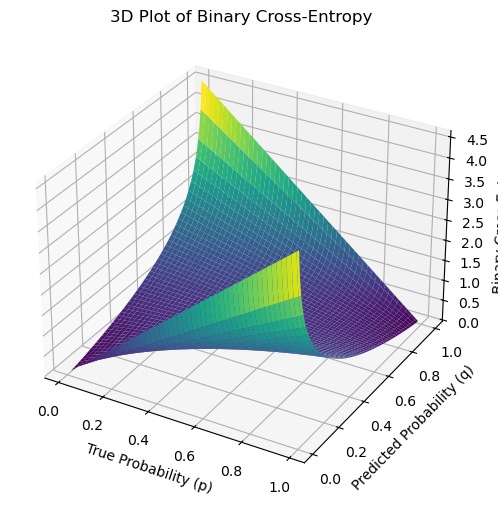

In [4]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt

# Define the binary cross-entropy function
def binary_cross_entropy(p, q):
    return -(p * np.log(q) + (1 - p) * np.log(1 - q))

# Generate values for p and q
p_values = np.linspace(0.01, 0.99, 100)  # Avoid 0 and 1 to prevent log(0)
q_values = np.linspace(0.01, 0.99, 100)
p, q = np.meshgrid(p_values, q_values)

# Calculate binary cross-entropy for each pair of p and q
bce = binary_cross_entropy(p, q)

# Create a 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(p, q, bce, cmap='viridis')

# Set plot labels
ax.set_xlabel('True Probability (p)')
ax.set_ylabel('Predicted Probability (q)')
ax.set_zlabel('Binary Cross-Entropy')
ax.set_title('3D Plot of Binary Cross-Entropy')

plt.show()

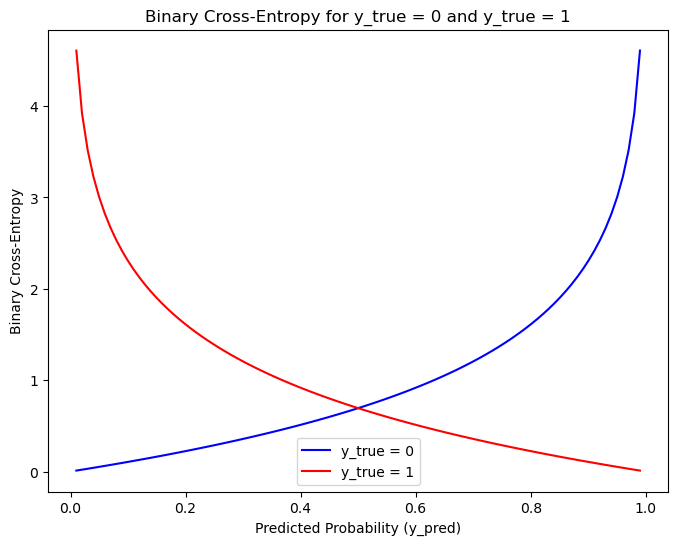

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define the binary cross-entropy function for hard labels
def binary_cross_entropy_hard_labels(y_true, y_pred):
    return -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Generate values for y_pred (predicted probabilities)
y_pred_values = np.linspace(0.01, 0.99, 100)  # Avoid 0 and 1 to prevent log(0)

# Calculate binary cross-entropy for y_true = 0 and y_true = 1
bce_y_true_0 = binary_cross_entropy_hard_labels(0, y_pred_values)
bce_y_true_1 = binary_cross_entropy_hard_labels(1, y_pred_values)

# Create a single plot for both y_true values
plt.figure(figsize=(8, 6))

# Plot binary cross-entropy for y_true = 0
plt.plot(y_pred_values, bce_y_true_0, label='y_true = 0', color='blue')

# Plot binary cross-entropy for y_true = 1
plt.plot(y_pred_values, bce_y_true_1, label='y_true = 1', color='red')

# Add titles and labels
plt.title('Binary Cross-Entropy for y_true = 0 and y_true = 1')
plt.xlabel('Predicted Probability (y_pred)')
plt.ylabel('Binary Cross-Entropy')

# Add a legend to distinguish between the two plots
plt.legend()

# Show the plot
plt.show()

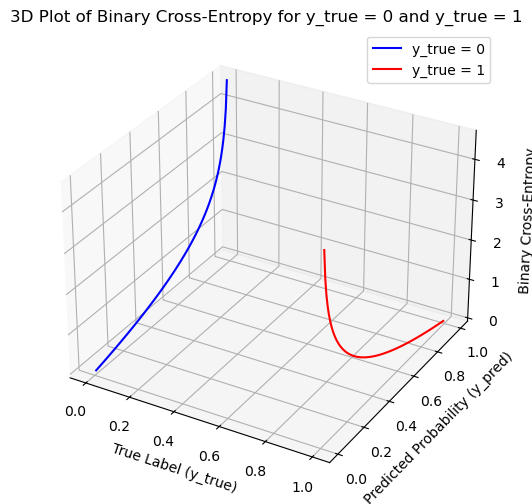

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the binary cross-entropy function for hard labels
def binary_cross_entropy_hard_labels(y_true, y_pred):
    return -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Generate values for y_pred (predicted probabilities)
y_pred_values = np.linspace(0.01, 0.99, 100)  # Avoid 0 and 1 to prevent log(0)

# Calculate binary cross-entropy for y_true = 0 and y_true = 1
bce_y_true_0 = binary_cross_entropy_hard_labels(0, y_pred_values)
bce_y_true_1 = binary_cross_entropy_hard_labels(1, y_pred_values)

# Create a 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot binary cross-entropy for y_true = 0
ax.plot3D(np.zeros_like(y_pred_values), y_pred_values, bce_y_true_0, color='blue', label='y_true = 0')

# Plot binary cross-entropy for y_true = 1
ax.plot3D(np.ones_like(y_pred_values), y_pred_values, bce_y_true_1, color='red', label='y_true = 1')

# Set plot labels
ax.set_xlabel('True Label (y_true)')
ax.set_ylabel('Predicted Probability (y_pred)')
ax.set_zlabel('Binary Cross-Entropy')
ax.set_title('3D Plot of Binary Cross-Entropy for y_true = 0 and y_true = 1')

# Add a legend to distinguish between the two curves
ax.legend()

# Show the plot
plt.show()

## Example

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

# Define the true distribution p(x)
p = np.array([0.1, 0.2, 0.3, 0.4])

# Function to calculate cross-entropy
def cross_entropy(p, q):
    return -np.sum(p * np.log(q))

# Create a list to store the images
images = []

# Generate frames for the GIF
for i in range(0, 101):
    # Define the predicted distribution q(x) that becomes more similar to p(x) over time
    q = p * (i / 100) + (1 - p) * (1 - i / 100)
    
    # Calculate cross-entropy
    ce = cross_entropy(p, q)
    
    # Plot the distributions and cross-entropy value
    plt.figure(figsize=(8, 4))
    plt.bar(range(len(p)), p, alpha=0.6, label='p(x)')
    plt.bar(range(len(q)), q, alpha=0.6, label='q(x)')
    plt.title(f'Cross-Entropy: {ce:.4f}')
    plt.xlabel('x')
    plt.ylabel('Probability')
    plt.legend()
    # Save the plot as an image
    plt.savefig(f'./../assets/cross_entropy_frame_{i}.png')
    plt.close()
    
    # Append the image to the list
    images.append(imageio.imread(f'./../assets/cross_entropy_frame_{i}.png'))

# Create the GIF
imageio.mimsave('./../assets/cross_entropy.gif', images, duration=0.1)



/var/folders/p9/vwq0gfs15vb07tg6xw1r14180000gn/T/ipykernel_63877/3855053140.py:41: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(f'frame_{i}.png'))


### Minimum Cross Entropy

When p = q, the cross entropy loss function is minimized. In this case, the cross entropy loss function is equal to the entropy of the true distribution. The entropy of a probability density function is defined as:

$$
H(p) = -\int p(x) \log p(x) dx
$$

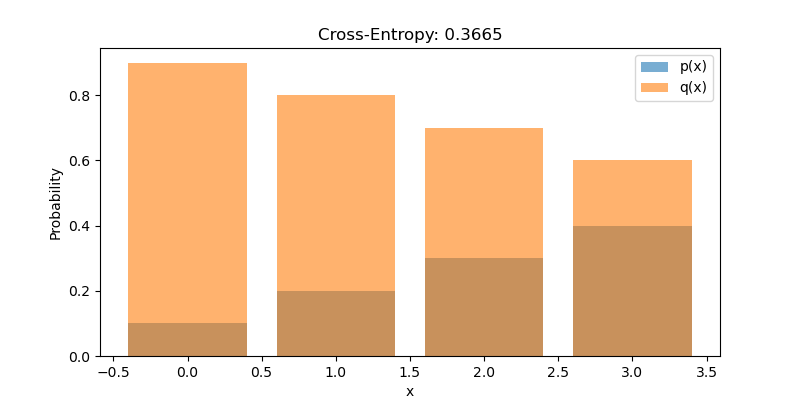

In [23]:
Image(filename='frame_0.png')

### Cross Entropy

Increasing the cross entropy loss function means that the predicted distribution is different from the true distribution.

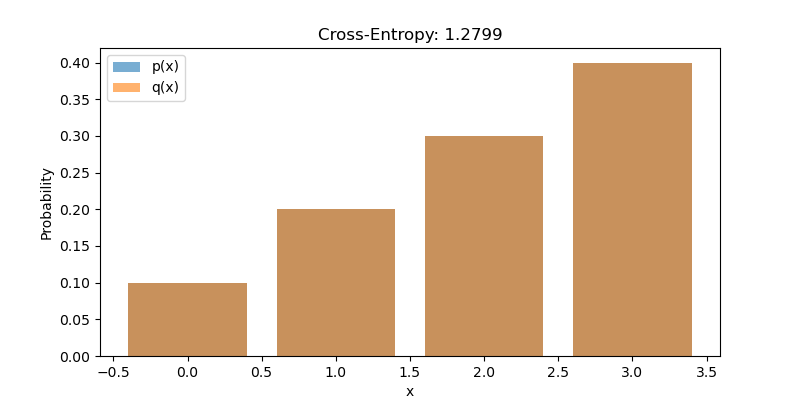

In [24]:
Image(filename='frame_100.png')

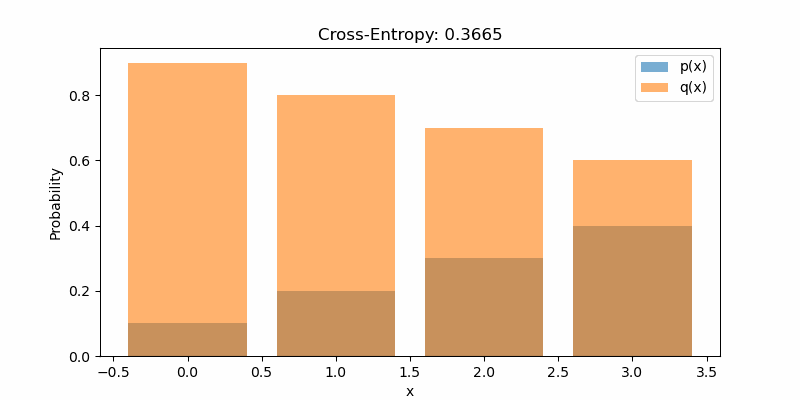

In [20]:
# Display the GIF
from IPython.display import Image
Image(filename='cross_entropy.gif')

# Maximizing Cross Entropy

If we increase the cross entropy loss function to infinity, the predicted distribution is completely different from the true distribution. 

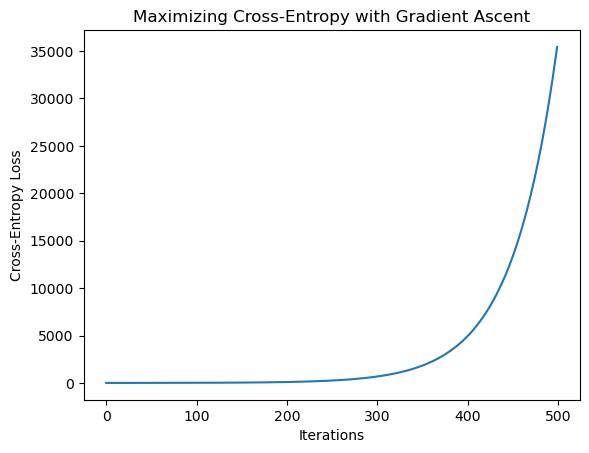

Optimized mu_q: 224.46925219155312
Optimized sigma_q: 148.00461190609298


In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Define the true distribution p(x) (standard normal)
mu_p = 0
sigma_p = 1  # Fixed since p(x) is standard normal

# Define the predicted distribution q(x) with initial parameters mu_q and sigma_q
mu_q = np.random.randn()  # Initial guess for mean
sigma_q = np.random.rand()  # Initial guess for std dev

# Define the cross-entropy between two normal distributions (simplified for standard normal p(x))
def cross_entropy(mu_p, sigma_p, mu_q, sigma_q):
    return np.log(sigma_q) + (sigma_q**2 + mu_q**2) / 2 + 0.5

# Gradient of cross-entropy with respect to mu_q and sigma_q
def gradients(mu_p, sigma_p, mu_q, sigma_q):
    grad_mu_q = mu_q  # Gradient w.r.t. mu_q
    grad_sigma_q = 1/sigma_q + sigma_q  # Gradient w.r.t. sigma_q
    return grad_mu_q, grad_sigma_q

# Gradient ascent parameters (note: maximizing so we use +learning_rate)
learning_rate = 0.01
iterations = 500

# Gradient ascent loop
losses = []
mu_q_vals = []
sigma_q_vals = []

for _ in range(iterations):
    # Compute current cross-entropy
    loss = cross_entropy(mu_p, sigma_p, mu_q, sigma_q)
    losses.append(loss)
    mu_q_vals.append(mu_q)
    sigma_q_vals.append(sigma_q)

    # Compute gradients
    grad_mu_q, grad_sigma_q = gradients(mu_p, sigma_p, mu_q, sigma_q)

    # Update parameters using gradient ascent (maximize)
    mu_q += learning_rate * grad_mu_q
    sigma_q += learning_rate * grad_sigma_q

    # Ensure sigma_q stays positive (standard deviation cannot be negative)
    sigma_q = np.abs(sigma_q)

# Plot the loss over iterations (maximize cross-entropy)
plt.plot(losses)
plt.xlabel('Iterations')
plt.ylabel('Cross-Entropy Loss')
plt.title('Maximizing Cross-Entropy with Gradient Ascent')
plt.show()

# Print final optimized values
print(f"Optimized mu_q: {mu_q}")
print(f"Optimized sigma_q: {sigma_q}")

### Maximising Cross Entropy Loss

There is no upper bound on the cross-entropy loss. The cross-entropy loss can be maximized by making the predicted distribution $\hat{p}(x|\theta)$ as different as possible from the true distribution $p(x)$. This is done by making the predicted probabilities as close to zero as possible for the true data points and as close to one as possible for the false data points.

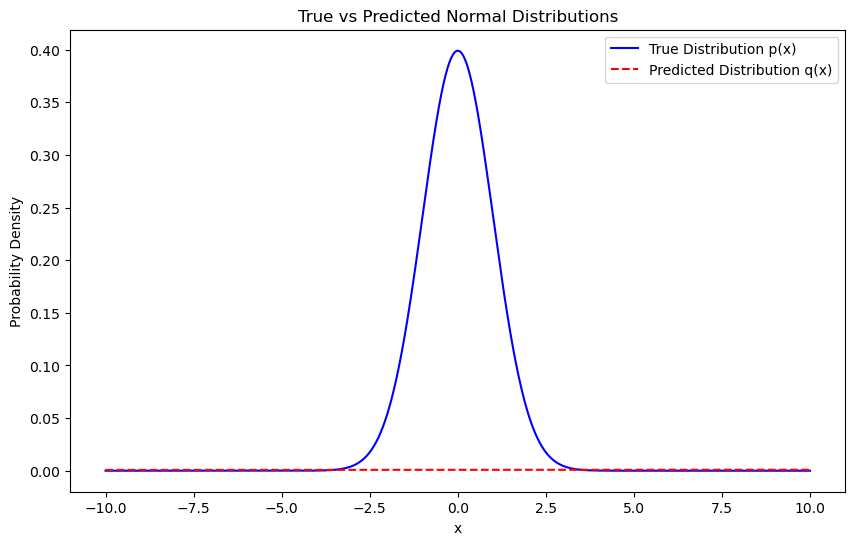

In [28]:
import scipy.stats as stats

# Define the range for x-axis
x = np.linspace(-10, 10, 1000)

# True distribution p(x) (standard normal)
p_x = stats.norm.pdf(x, mu_p, sigma_p)

# Predicted distribution q(x) with optimized parameters
q_x = stats.norm.pdf(x, mu_q, sigma_q)

# Plot the distributions
plt.figure(figsize=(10, 6))
plt.plot(x, p_x, label='True Distribution p(x)', color='blue')
plt.plot(x, q_x, label='Predicted Distribution q(x)', color='red', linestyle='--')
plt.title('True vs Predicted Normal Distributions')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.show()